# TP7 K-means clustering, image compression


### Table of Contents

* [1. K-means clustering](#chapter1)
* [2. Application : image compression](#chapter2)

--------------------

## 1. K-means clustering<a class="anchor" id="chapter1"></a> 

The data we will use for K-means clustering is generated by the following code cell: This dataset consists of a mixture of i.i.d. samples drawn from their respective statistical distributions $\mathcal{N}\left(\begin{pmatrix}0\\0\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$, $\mathcal{N}\left(\begin{pmatrix}1\\4\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$, $\mathcal{N}\left(\begin{pmatrix}-3\\2\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$.

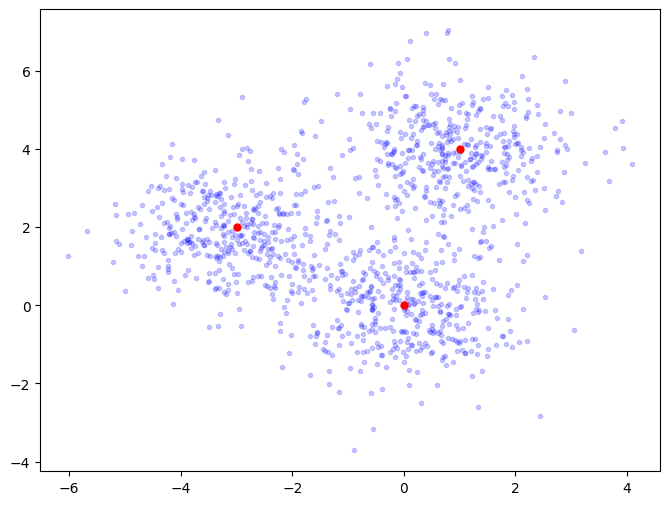

In [154]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12)
num_observations = 400

center1 = [0, 0]
center2 = [1, 4]
center3 = [-3, 2]

x1 = np.random.multivariate_normal(center1, [[1, 0], [0, 1]], num_observations)
x2 = np.random.multivariate_normal(center2, [[1, 0], [0, 1]], num_observations)
x3 = np.random.multivariate_normal(center3, [[1, 0], [0, 1]], num_observations)

X = np.vstack((x1, x2, x3)).astype(np.float32)

plt.figure(figsize=(8, 6))
plt.plot(X[:, 0], X[:, 1], ".b", alpha=0.2)
plt.plot(center1[0], center1[1], ".", color="red", markersize=10)
plt.plot(center2[0], center2[1], ".", color="red", markersize=10)
plt.plot(center3[0], center3[1], ".", color="red", markersize=10)
plt.show()

**Exercice 1** : Create a K-means model with K=3, named `kmeans1`. Then fit `kmeans1` to the data `X`. 

Hint : we will use `KMeans` in `sklearn.cluster` : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html# 

In [155]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(X)

KMeans(n_clusters=3)

**Exercice 2**  Display the `cluster centers`. What do you observe?

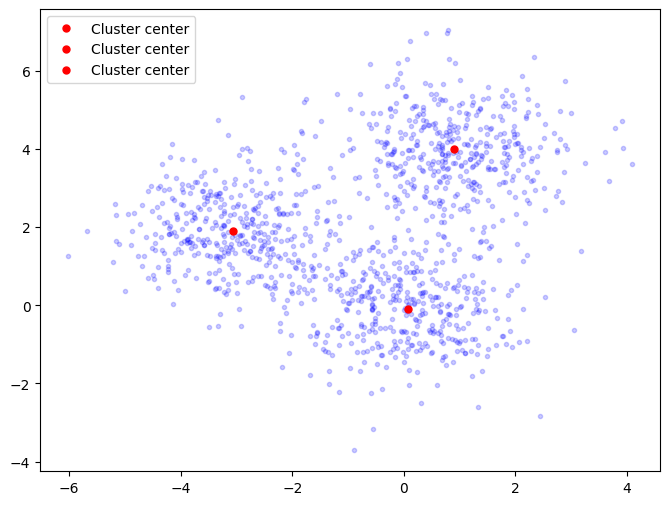

In [156]:
plt.figure(figsize=(8, 6))
plt.plot(X[:, 0], X[:, 1], ".b", alpha=0.2)
for center in kmeans1.cluster_centers_:
    plt.plot(
        center[0], center[1], ".", color="red", markersize=10, label="Cluster center"
    )
plt.legend()
plt.show()

*Réponse*: On observe que 

**Exercice 3** : *(Optional)* 
Now we will plot the Voronoi cells generated by the cluster centers from *Exercise 2* on the data.




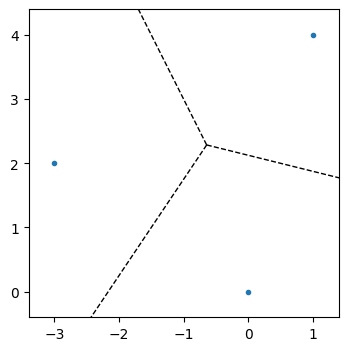

In [157]:
# Hint: An example for plotting the Voronoi partition
from scipy.spatial import Voronoi, voronoi_plot_2d

points_generer_voronoi = np.array([[0, 0], [1, 4], [-3, 2]])

vor = Voronoi(points_generer_voronoi)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

fig = voronoi_plot_2d(vor, ax=ax, show_vertices=False)

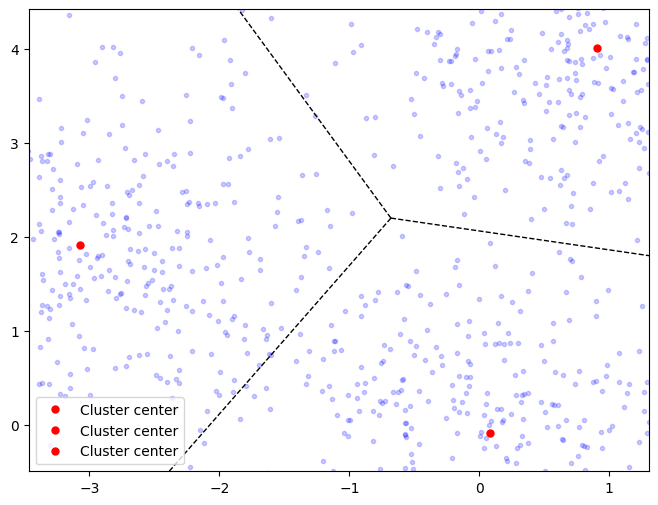

In [158]:
# Answer for Exercise 3


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.plot(X[:, 0], X[:, 1], ".b", alpha=0.2)

vor = Voronoi(kmeans1.cluster_centers_)
fig = voronoi_plot_2d(vor, ax=ax, show_vertices=False)

for center in kmeans1.cluster_centers_:
    plt.plot(
        center[0], center[1], ".", color="red", markersize=10, label="Cluster center"
    )
plt.legend()
plt.show()

--------------------

## 2. Application : image compression<a class="anchor" id="chapter2"></a> 

Now we will work through an example application of K-means: image compression. We will compress the image `zelda.png` located in the TP7 folder.

*(The Zelda image we’ll use comes from the website: https://www.journaldugeek.com/test/impressions-zelda-breath-of-the-wild-zelda-est-mort/)*

First, we will load the image, i.e., convert it into a matrix.

**Exercise 4** :  
1. Load the image `zelda.png` using `plt.imread` and name it `image_zelda`.
2. What is the datatype of `image_zelda` i.e. the output of  `plt.imread` ?

Hint :  package `plt.imread`: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imread.html

In [159]:
image_zelda = plt.imread("assets/zelda.png")
print(type(image_zelda))

<class 'numpy.ndarray'>


**Exercise 5** : what is the dimension of `image_zelda` ? what does it correspond to ?

Hint : RGB (red/rouge green/vert blue/bleu) cube :
https://en.wikipedia.org/wiki/RGB_color_model#/media/File:RGB_color_solid_cube.png

In [160]:
print(image_zelda.shape)

(1080, 1920, 3)


-------------------------------
The idea behind image compression using K-means is as follows: we select the $K$ most *representative* colors from all the colors in the image. Then, we map each pixel's color to the closest representative color.

We treat the color of each pixel in `image_zelda` as a point in $\mathbb{R}^3$. In total, we have $1080 \times 1920$ points in $\mathbb{R}^3$. So, the 'most representative $K$ colors' correspond to selecting the $K$ optimal cluster centers — that is, an optimal level-$K$ quantization grid.

Since the shape of `image_zelda` is (1080, 1920, 3), we need to reshape the data to dimension $(1080 \times 1920, 3)$ before applying K-means.

**Exercice 6** : `Reshape` `image_zelda` into  a $(1080\times 1920, 3)$ array and name it `colors`.

In [161]:
colors = image_zelda.reshape(-1, 3)
print(colors.shape)

(2073600, 3)


**Exercice 7** : 
Create a K-means model with `n_clusters=20`, named `compress_model`. Then fit `compress_model` to `colors` from *Exercise 6*.

(The computation time is approximately 3 minutes.)

In [162]:
compress_model = KMeans(n_clusters=20)
compress_model.fit(colors)

KMeans(n_clusters=20)

**Exercise 8** : What do the attribute `compress_model.label_` and ` compress_model.cluster_centers_` mean ?

Hint : read the description of `sklearn.cluster.KMeans`.

In [163]:
print("1:", compress_model.labels_)
print("2:", compress_model.labels_.shape)
print("3:", compress_model.cluster_centers_)
print("4:", compress_model.cluster_centers_.shape)

1: [14 14 14 ...  0  0  9]
2: (2073600,)
3: [[0.29173306 0.58679456 0.82529604]
 [0.70614487 0.79877245 0.85092956]
 [0.22620928 0.23121315 0.1548881 ]
 [0.71570563 0.67520803 0.5341618 ]
 [0.95525753 0.9648403  0.9193664 ]
 [0.5711164  0.73517704 0.8661032 ]
 [0.86609066 0.8601293  0.7982736 ]
 [0.82244074 0.8017024  0.71498406]
 [0.7292771  0.8967676  0.9424115 ]
 [0.3723002  0.6411056  0.8481754 ]
 [0.50935966 0.49789768 0.39012173]
 [0.6114144  0.825016   0.9487847 ]
 [0.22437122 0.3343432  0.31531608]
 [0.6186209  0.419982   0.1755203 ]
 [0.86342967 0.94408983 0.9209    ]
 [0.7705494  0.7451689  0.6413459 ]
 [0.6899072  0.6078373  0.39280722]
 [0.45827886 0.68543136 0.85876405]
 [0.4974792  0.7705515  0.94075847]
 [0.90903723 0.708804   0.16177583]]
4: (20, 3)


Answer for Ex.8 :







Solution for Ex.8 : 

1. `compress_model.cluster_centers_` are the cluster centers : each cluster center consists in the RGB code of the representative color.
2. `compress_model.label_` returns the cluster to which the pixel belongs. 


**Exercise 9** :
Now we will replace each pixel's color with the closest 'representative' color. The replaced colors will be stored in a new vector called `color_new`.

In [164]:
color_new = np.zeros_like(colors)

labels = compress_model.labels_
centers = compress_model.cluster_centers_

for i in range(len(colors)):
    color_new[i] = centers[labels[i]]

**Exercise 10** : What is the shape of `color_new`? What should we do to obtain the compressed image? Name the compressed image `zelda_new`.

In [165]:
print(color_new.shape)
zelda_new = color_new.reshape((1080, 1920, 3))
print(zelda_new.shape)

(2073600, 3)
(1080, 1920, 3)


Final step: save `zelda_new` as a `.png` file, then compare the file size of `zelda_new.png` with that of the original `zelda.png`.

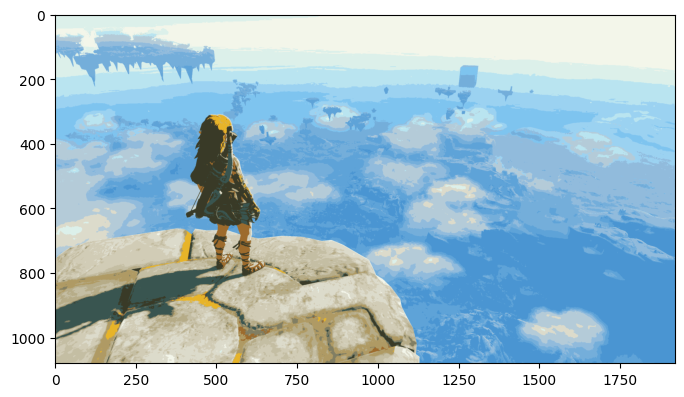

In [166]:
import matplotlib.image as mpimg

mpimg.imsave("assets/zelda_new.png", zelda_new)

plt.figure(figsize=(8, 6))
plt.imshow(zelda_new)
plt.show()

In [167]:
import os

size_new = os.path.getsize("assets/zelda_new.png")
size_old = os.path.getsize("assets/zelda.png")

print("The original size is ", size_old, "bytes.")
print("The compressed size is ", size_new, "bytes.")

print(f"The compression factor is {size_old / size_new: .3f}")

The original size is  1826283 bytes.
The compressed size is  260132 bytes.
The compression factor is  7.021


-------------------------------------------------
Now we will convert a photo from the 2021–2022 mid-term exam (see the next cell) into a black-and-white image.

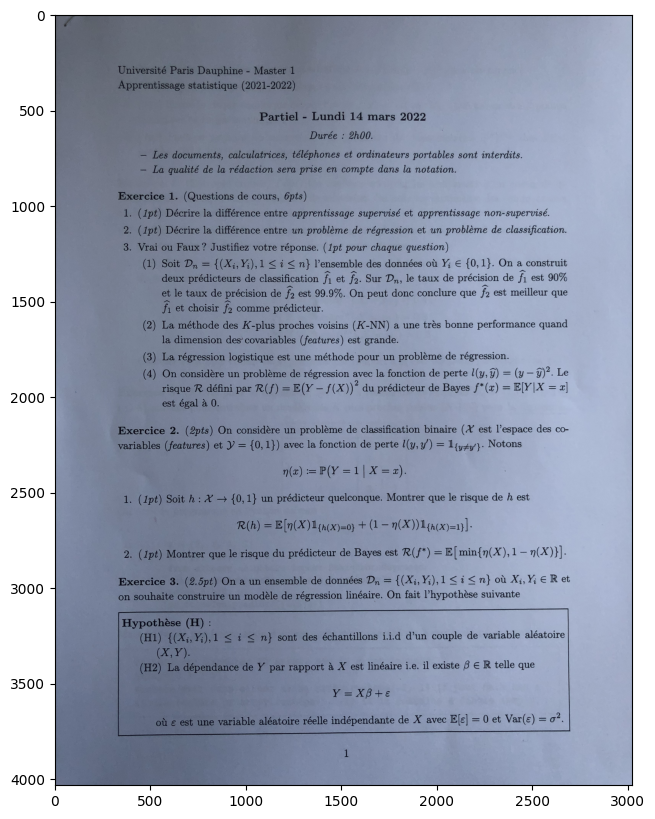

In [168]:
partiel = plt.imread("assets/partiel.png")
plt.figure(figsize=(20, 10))
plt.imshow(partiel)

In [169]:
print(partiel.shape)

(4032, 3024, 3)


**Exercise 11** : Steps to convert the image *partiel.png* into a black-and-white image named *partiel_new.png* are as follows:

1. **Display the shape of `partiel`.**  
   Each pixel is represented by a vector in $\mathbb{R}^3$ corresponding to its color.  
   (See for example: [https://ufkapano.github.io/scicomppy/week09/plt_colors.html](https://ufkapano.github.io/scicomppy/week09/plt_colors.html)).

2. **Create a new array `partiel_new` with the same shape as `partiel`.**  
   For each pixel in `partiel_new`, if the color is close to black — that is, if its distance from the black color $N = (0,0,0)$ (defined by `black_rgb = np.array([0, 0, 0])`) is less than a threshold $\varepsilon$ (e.g., $\varepsilon = 0.5$) — then replace it with black.  
   Otherwise, replace it with white $B = (1,1,1)$ (`white_rgb = np.array([1, 1, 1])`).

   **Note:** This is a quantization using a **fixed grid** $\{N=(0,0,0), B=(1,1,1)\}$ with the projection function:
   $$
   \text{Proj}_{N\&B}(\xi) := N \cdot \mathbf{1}_{\mathbf{B}(N, \varepsilon)}(\xi) + B \cdot \mathbf{1}_{\mathbf{B}(N, \varepsilon)^C}(\xi)
   $$
   where this projection assigns each color to either black or white depending on its proximity to black.  
   This is **not** an optimal quantization.

   *(Notation: $\mathbf{B}(x, a) = \{ y \in [0,1]^3 \mid |y - x| \leq a \}$ is the ball centered at $x$ with radius $a$.)*

3. **Save the resulting image as *partiel_new.png*, and compare its file size with *partiel.png*.**

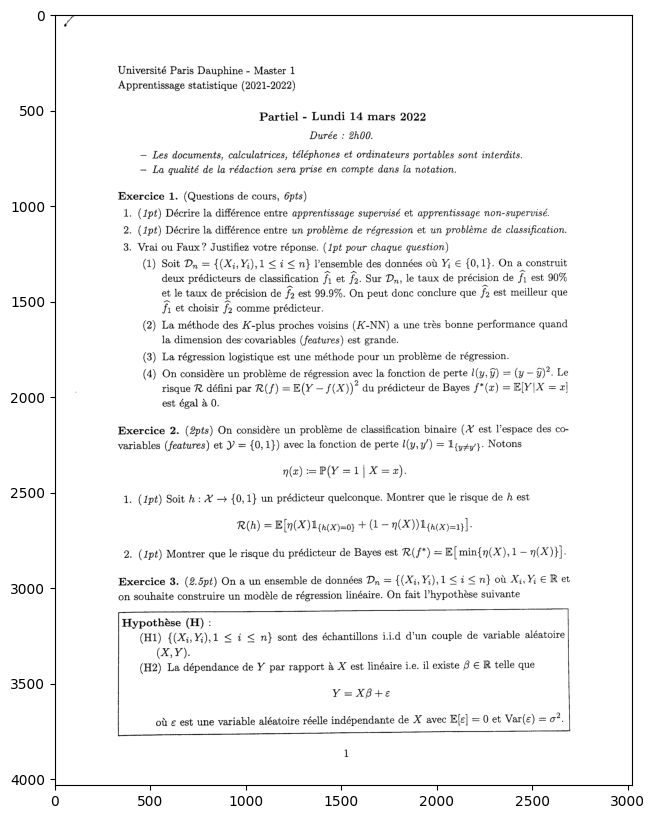

In [170]:
partiel_new = np.zeros_like(partiel)

noir_rgb = np.array([0, 0, 0])
blanc_rgb = np.array([1, 1, 1])

epsilon = 0.5  # threshold

distances = np.linalg.norm(partiel - noir_rgb, axis=2)
partiel_new = np.zeros_like(partiel)
partiel_new[distances <= epsilon] = noir_rgb
partiel_new[distances > epsilon] = blanc_rgb

mpimg.imsave("assets/partiel_new.png", partiel_new)

plt.figure(figsize=(20, 10))
plt.imshow(partiel_new)
plt.show()

## 3. (OPTIONAL) K-means on MNIST<a class="anchor" id="chapter3"></a> 
Now we want Implement K-means on MNIST. 

**Exercise 12**

a) Load the dataset MNIST and fit K-means on X_train. We will not use X_test nor Y_test. 

KMeans is unsupervised: It clusters images based on similarity, not true class labels. So the labels associated with the clusters are unlikely to match the correct digit: for example, if a cluster found by Lloyd's algorithm mostly contains images of the digit 1, it will still be assigned an arbitrary label from 0 to 9. Therefore, we need to find a way to assign the correct digit to each cluster identified by the clustering algorithm. To do this, we will use `y_train`.

b) One basic way to "correctly" label the clusters is to assign each cluster the most frequent label within it. Write a function called `map_clusters_to_labels` that takes as arguments the clusters and the true labels, and returns an array with 10 elements representing this mapping. Then display the labels associated to each cluster. 

Hint : you can use https://docs.scipy.org/doc/scipy-1.15.2/reference/generated/scipy.stats.mode.html

c) Display the accuracy score and the confusion matrix. 


In [174]:
import tensorflow as tf
from scipy.stats import mode

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28 * 28)

kmeans2 = KMeans(n_clusters=10)
clusters = kmeans2.fit_predict(X_train)


def map_clusters_to_labels(clusters, true_labels):
    return np.array(
        [mode(true_labels[clusters == i], keepdims=True).mode[0] for i in range(10)]
    )


cluster_to_label = map_clusters_to_labels(clusters, y_train)
print("Cluster to label mapping:", cluster_to_label)

Cluster to label mapping: [8 0 1 0 7 7 3 2 4 6]


In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(cluster_to_label, labels))
print(confusion_matrix(cluster_to_label, labels))

ValueError: Found input variables with inconsistent numbers of samples: [10, 2073600]